# Malnutrition across the globe

## Context

Malnutrition continues to be the reason for making children much more vulnerable to diseases and death.
There are 4 broad types of malnutrition: wasting, stunting, underweight and overweight.

## Content

Severe Wasting - % of children aged 0–59 months who are below minus three standard deviations from median weight-for-height

Wasting – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median weight-for-height

Overweight – Moderate and severe: % aged 0-59 months who are above two standard deviations from median weight-for-height

Stunting – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median height-for-age

Underweight – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median weight-for-age

## Inspiration

Was there a decline or rise in the number of malnutrition cases country-wise?
Which countries bear the greatest share of all forms of malnutrition?
% of stunted, overweight and wasted children under 5, by country income classification

## Exploring the Data

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
%matplotlib inline

### Loading the data

In [194]:
df_country = pd.read_csv('country-wise-average.csv',index_col='Country')
df_malnutrition = pd.read_csv('malnutrition-estimates.csv',index_col='Country')
df_malnutrition.drop('Unnamed: 0',axis=1,inplace=True)

country_cont = pd.read_csv('https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv',index_col='Three_Letter_Country_Code')

### Data information

In [27]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, AFGHANISTAN to ZIMBABWE
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income Classification  152 non-null    float64
 1   Severe Wasting         140 non-null    float64
 2   Wasting                150 non-null    float64
 3   Overweight             149 non-null    float64
 4   Stunting               151 non-null    float64
 5   Underweight            150 non-null    float64
 6   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7)
memory usage: 9.5+ KB


In [28]:
df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, AFGHANISTAN to ZIMBABWE
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISO code               924 non-null    object 
 1   Survey Year            924 non-null    object 
 2   Year                   924 non-null    int64  
 3   Income Classification  924 non-null    int64  
 4   LDC                    924 non-null    float64
 5   LIFD                   924 non-null    float64
 6   LLDC or SID2           924 non-null    float64
 7   Survey Sample (N)      861 non-null    object 
 8   Severe Wasting         696 non-null    float64
 9   Wasting                877 non-null    float64
 10  Overweight             788 non-null    float64
 11  Stunting               887 non-null    float64
 12  Underweight            902 non-null    float64
 13  Notes                  327 non-null    object 
 14  Report Author          924 non-null    object 
 

In [79]:
country_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, Afghanistan, Islamic Republic of to Spratly Islands
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Two_Letter_Country_Code    261 non-null    object 
 3   Three_Letter_Country_Code  258 non-null    object 
 4   Country_Number             258 non-null    float64
dtypes: float64(1), object(4)
memory usage: 12.3+ KB


In [32]:
df_country.isna().sum()

Income Classification     0
Severe Wasting           12
Wasting                   2
Overweight                3
Stunting                  1
Underweight               2
U5 Population ('000s)     0
dtype: int64

In [33]:
df_malnutrition.isna().sum()

ISO code                   0
Survey Year                0
Year                       0
Income Classification      0
LDC                        0
LIFD                       0
LLDC or SID2               0
Survey Sample (N)         63
Severe Wasting           228
Wasting                   47
Overweight               136
Stunting                  37
Underweight               22
Notes                    597
Report Author              0
Source                     0
Short Source               0
U5 Population ('000s)      0
dtype: int64

### Head

In [29]:
df_country.head()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
Country,,,,,,,
AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [204]:
df_malnutrition.head(10)

,ISO code,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
Country,,,,,,,,,,,,,,,,,,
AFGHANISTAN,AFG,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
AFGHANISTAN,AFG,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
AFGHANISTAN,AFG,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
AFGHANISTAN,AFG,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
ALBANIA,ALB,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225
ALBANIA,ALB,2000,2000,2,0.0,0.0,0.0,"1,382",6.2,12.2,30.1,39.2,17.0,NaN,National Institute of Statistics (Albania) and...,Multiple indicator cluster survey report Alban...,MICS,279.835
ALBANIA,ALB,2005,2005,2,0.0,0.0,0.0,"1,090",3.7,7.3,24.8,26.7,6.6,NaN,Albanian National Institute of Statistics.,Albania multiple indicator cluster survey 2005...,MICS,219.405
ALBANIA,ALB,2008-09,2009,2,0.0,0.0,0.0,"1,489",5.9,9.6,23.2,23.2,6.3,NaN,"Institute of Statistics, Institute of Public H...",Albania demographic and health survey 2008-09....,DHS,179.312
ALBANIA,ALB,2017-18,2017,2,0.0,0.0,0.0,"2,367",0.5,1.6,16.4,11.3,1.5,NaN,"Institute of Statistics, Institute of Public H...",Albania Demographic and Health Survey 2017-18....,DHS,176.522


In [157]:
country_cont.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Country_Number
Three_Letter_Country_Code,,,,,
AFG,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
ALB,Europe,EU,"Albania, Republic of",AL,8.0
ATA,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,10.0
DZA,Africa,AF,"Algeria, People's Democratic Republic of",DZ,12.0
ASM,Oceania,OC,American Samoa,AS,16.0


### Statistical description

In [43]:
df_country.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,152.000000,140.000000,150.000000,149.000000,151.000000,150.000000,152.000000
mean,1.427632,2.168650,6.599257,7.201638,25.814728,13.503047,4042.927052
std,0.967019,1.708939,4.481723,4.649144,14.686807,10.895839,13164.191927
min,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,1.000000,0.900000,3.262500,3.850000,13.485000,4.305000,241.765813
50%,1.000000,1.872500,5.710714,6.300000,24.160000,10.380000,981.233486
75%,2.000000,2.822727,8.740476,9.080000,36.564935,19.496875,3002.433080
max,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


In [44]:
df_malnutrition.describe()

,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,924.000000,924.00000,924.000000,924.000000,924.000000,696.000000,877.000000,788.000000,887.000000,902.000000,924.000000
mean,2003.730519,1.24026,0.349567,0.424242,0.455628,2.191523,6.955644,6.434772,29.063134,15.841242,6182.704516
std,8.792535,0.92202,0.477091,0.494495,0.686648,1.912586,5.039402,4.638849,15.834657,12.509643,16795.938144
min,1983.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1996.000000,1.00000,0.000000,0.000000,0.000000,0.800000,2.900000,2.900000,16.650000,4.925000,559.669000
50%,2004.500000,1.00000,0.000000,0.000000,0.000000,1.600000,5.900000,5.500000,29.200000,13.400000,1795.523000
75%,2011.000000,2.00000,1.000000,1.000000,1.000000,2.900000,9.700000,8.700000,40.200000,23.100000,4194.214000
max,2019.000000,3.00000,1.000000,1.000000,2.000000,12.900000,25.300000,30.100000,73.600000,66.800000,132966.782000


### Adding continent to the data frames

In [123]:
iso_codes = df_malnutrition[['ISO code']].drop_duplicates()
iso_codes

,ISO code
Country,
AFGHANISTAN,AFG
ALBANIA,ALB
ALGERIA,DZA
ANGOLA,AGO
ARGENTINA,ARG
...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),VEN
VIET NAM,VNM
YEMEN,YEM


In [129]:
iso_codes.loc['YEMEN','ISO code']

'YEM'

In [199]:
for country in iso_codes.index:
    df_country.loc[df_country.index==country,'ISO code']=iso_codes.loc[country,'ISO code']

for iso in df_country['ISO code'].unique():
    if country_cont.loc[iso,['Continent_Name']].size==1:
        df_country.loc[df_country['ISO code']==iso,'Continent']=country_cont.loc[iso,'Continent_Name']
    else:
        df_country.loc[df_country['ISO code']==iso,'Continent']=country_cont.loc[iso,'Continent_Name'][0]

df_country.head(10)

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),ISO code,Continent
Country,,,,,,,,,
AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500,AFG,Asia
ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800,ALB,Europe
ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143,DZA,Africa
ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000,AGO,Africa
ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750,ARG,South America
ARMENIA,2.0,1.600000,3.940000,13.620000,16.120000,3.480000,204.145200,ARM,Europe
AUSTRALIA,3.0,0.000000,0.000000,13.875000,1.000000,0.100000,1443.074500,AUS,Oceania
AZERBAIJAN,2.0,2.575000,5.433333,9.183333,21.816667,8.083333,740.501667,AZE,Europe
BAHRAIN,3.0,NaN,6.700000,7.500000,13.750000,6.950000,63.371000,BHR,Asia


## Data Visualization

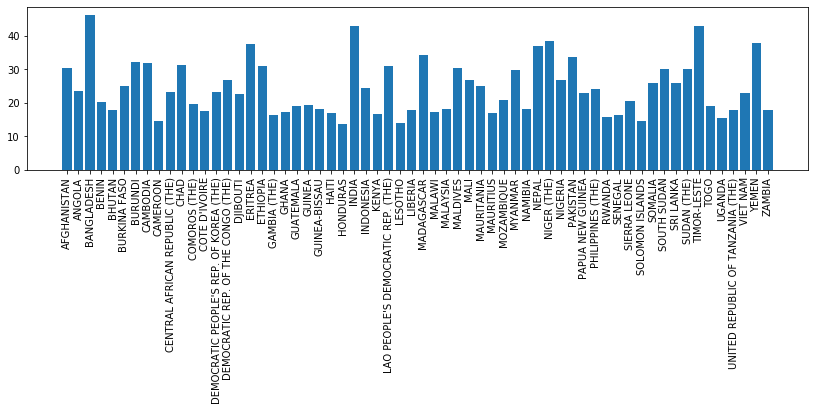

In [56]:
fig, ax = plt.subplots(figsize=(14,3))

above_mean = df_country['Underweight']>df_country['Underweight'].mean()

ax.bar(df_country[above_mean]['Underweight'].index,df_country[above_mean]['Underweight'])
ax.set_xticklabels(df_country[above_mean]['Underweight'].index,rotation=90)

plt.show()

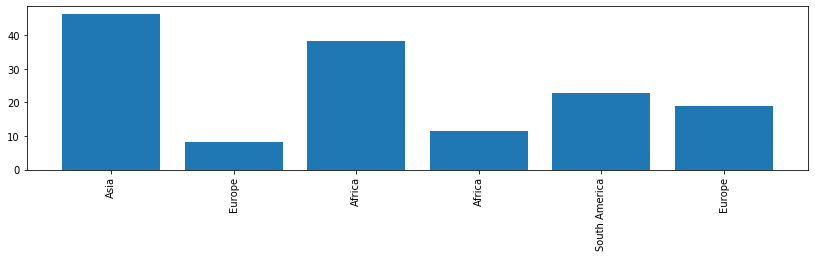

In [203]:
fig, ax = plt.subplots(figsize=(14,3))

ax.bar(df_country['Continent'],df_country['Underweight'])
ax.set_xticklabels(df_country['Continent'],rotation=90)

plt.show()

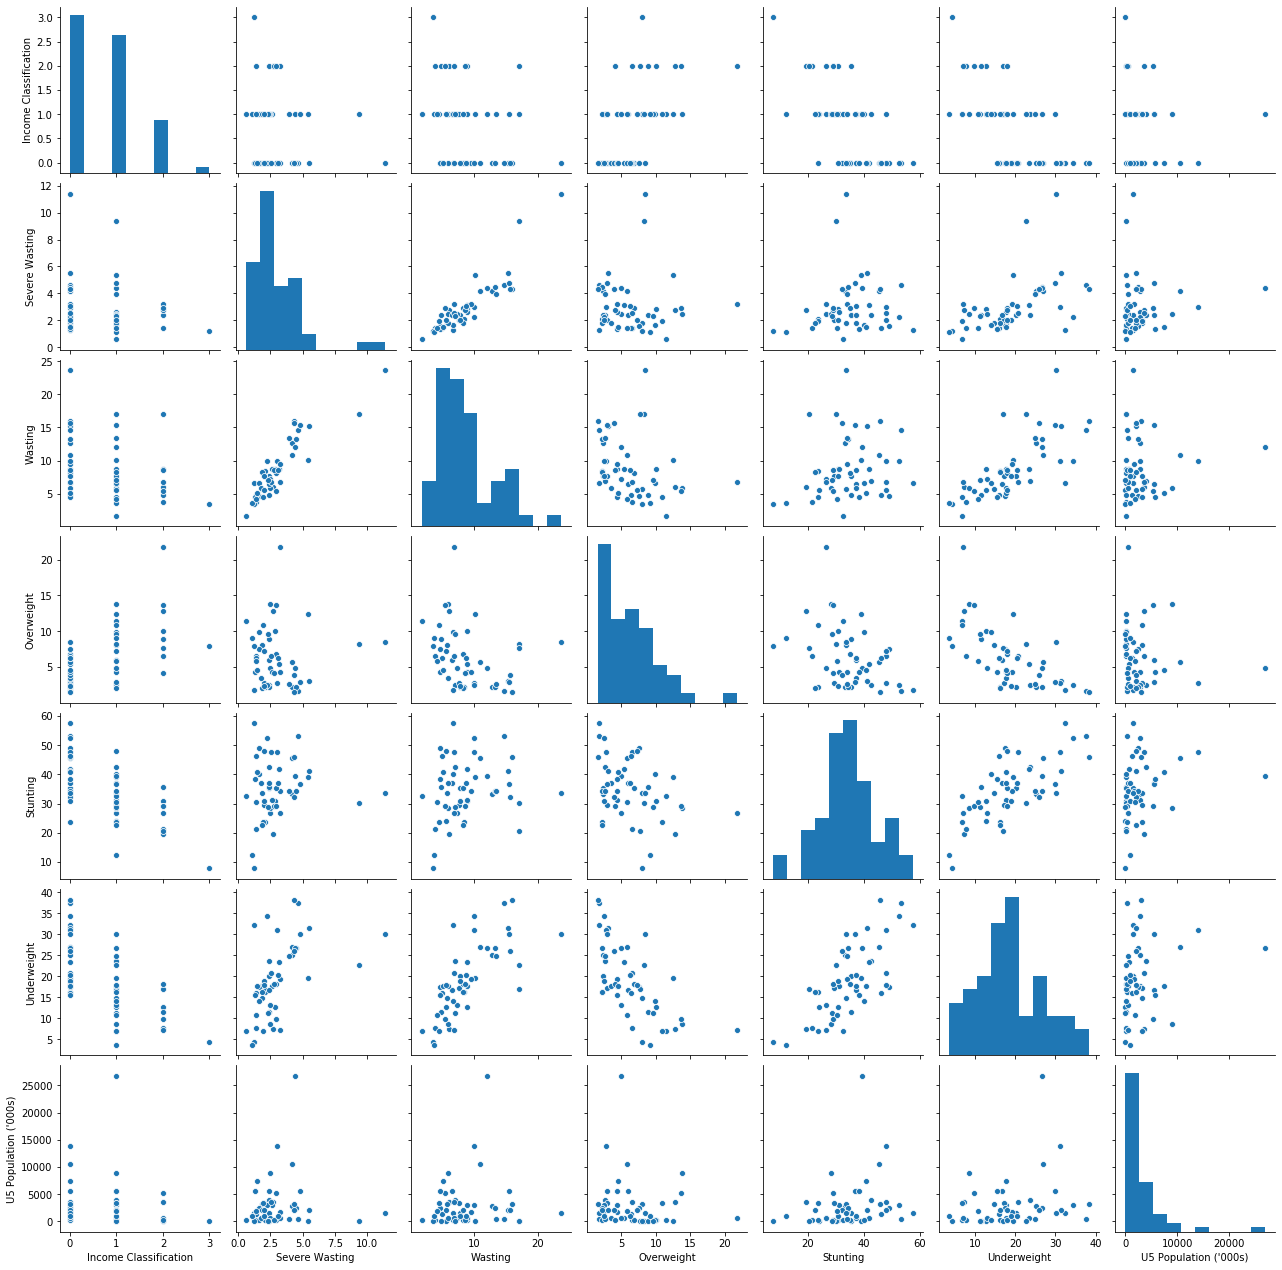

In [207]:
sns.pairplot(df_country[df_country['Continent']=='Africa'])